In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import joblib

In [2]:
data = pd.read_csv('data/cleaned_data.csv')
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
x = data.drop(['diagnosis'], axis=1)
y = data['diagnosis']

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
x_columns = x_train.columns
min_max_scaler = MinMaxScaler()
x_train_scaled = min_max_scaler.fit_transform(x_train)
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_columns)
x_train_scaled.head(10)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.370308,0.511437,0.359788,0.460143,0.340531,0.281396,0.438569,0.470707,0.229620,...,0.467805,0.356876,0.436725,0.286030,0.508684,0.380196,0.282137,0.678351,0.355038,0.319306
1,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.188750,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.195155,0.341880,0.558419,0.189639,0.230967
2,0.095556,0.158607,0.086863,0.043606,0.157263,0.036133,0.008625,0.017256,0.367677,0.397495,...,0.062931,0.214552,0.052244,0.024651,0.181206,0.027487,0.012581,0.047732,0.338641,0.244459
3,0.247480,0.148123,0.241794,0.135101,0.256838,0.180510,0.160239,0.125944,0.295960,0.248297,...,0.184988,0.193763,0.185467,0.084718,0.207555,0.236995,0.262906,0.314089,0.264021,0.353678
4,0.253632,0.177207,0.238408,0.138112,0.308658,0.080762,0.049414,0.102087,0.258081,0.150297,...,0.186766,0.128731,0.167837,0.085504,0.222083,0.044091,0.042060,0.164708,0.173954,0.048506
5,0.372900,0.244505,0.353120,0.224899,0.330505,0.157536,0.078397,0.142992,0.259091,0.149198,...,0.298115,0.227079,0.258429,0.145571,0.334346,0.140247,0.104274,0.273918,0.227899,0.139844
6,0.310426,0.157254,0.301776,0.179343,0.407692,0.189896,0.156139,0.237624,0.416667,0.163041,...,0.255425,0.192964,0.245480,0.129276,0.480948,0.164736,0.204274,0.442612,0.335314,0.186101
7,0.610961,0.356781,0.599198,0.454083,0.461045,0.342372,0.330600,0.468738,0.374747,0.255768,...,0.562078,0.352079,0.548284,0.359025,0.465760,0.333414,0.357692,0.554296,0.233603,0.387086
8,0.642198,0.377071,0.649644,0.493955,0.469170,0.473959,0.488519,0.657058,0.538889,0.269611,...,0.582355,0.358742,0.546790,0.399086,0.367364,0.314306,0.378889,0.738144,0.359078,0.219295
9,0.237068,0.513358,0.233709,0.126320,0.454726,0.223299,0.127484,0.212425,0.383838,0.401230,...,0.179651,0.488806,0.169680,0.080785,0.395760,0.170117,0.137521,0.413058,0.245485,0.292323


In [8]:
x_test_scaled = min_max_scaler.transform(x_test)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_columns)
x_test_scaled.head(10)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.364854,0.144403,0.376132,0.217434,0.455629,0.503711,0.339738,0.313121,0.518182,0.523401,...,0.303451,0.168443,0.317197,0.153362,0.396421,0.369214,0.275128,0.380756,0.299667,0.394796
1,0.292915,0.302672,0.291549,0.165896,0.570281,0.318140,0.287254,0.364811,0.539394,0.385190,...,0.275347,0.424574,0.260919,0.141123,0.709437,0.427527,0.427863,0.717526,0.554658,0.671271
2,0.282503,0.213392,0.271923,0.157031,0.432157,0.184191,0.144213,0.167495,0.338384,0.317732,...,0.206688,0.210821,0.191245,0.098358,0.509344,0.197132,0.191538,0.362887,0.431084,0.435057
3,0.536182,0.299966,0.516965,0.380700,0.300172,0.200294,0.191401,0.288966,0.283333,0.088113,...,0.475987,0.382196,0.442203,0.301022,0.344912,0.238532,0.302393,0.539863,0.389734,0.151729
4,0.385678,0.679743,0.365697,0.244327,0.275977,0.081805,0.109794,0.136133,0.400000,0.059328,...,0.331910,0.663380,0.297276,0.183396,0.288120,0.078376,0.132222,0.225945,0.396150,0.068958
5,0.434427,0.400068,0.431276,0.282630,0.434865,0.334397,0.244377,0.278976,0.555556,0.190508,...,0.410530,0.523987,0.394890,0.243266,0.451232,0.305520,0.255726,0.450859,0.454848,0.224649
6,0.577831,0.210687,0.570175,0.429905,0.309741,0.304030,0.279522,0.480467,0.343939,0.033399,...,0.501601,0.154318,0.479058,0.321913,0.272271,0.191421,0.193504,0.610653,0.208413,0.078167
7,0.525297,0.410213,0.508673,0.373489,0.190304,0.205632,0.258435,0.287177,0.358586,0.069435,...,0.420847,0.337953,0.391902,0.256292,0.112593,0.185601,0.216667,0.315498,0.190827,0.111040
8,0.165602,0.343253,0.158455,0.082375,0.490837,0.123704,0.113191,0.152584,0.341919,0.311140,...,0.126290,0.464819,0.115892,0.053480,0.530476,0.082703,0.100940,0.231478,0.312975,0.238462
9,0.357281,0.144403,0.346002,0.212386,0.517017,0.224035,0.161551,0.322813,0.297980,0.241046,...,0.279972,0.130864,0.262413,0.138788,0.419534,0.132340,0.117350,0.367354,0.247148,0.245101


In [9]:
joblib.dump(min_max_scaler, 'saved_objects/scaler.pkl')

['saved_objects/scaler.pkl']

In [10]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
# {'max_depth': 10, 'n_estimators': 5}

rf = RandomForestClassifier(n_estimators=5, max_depth=10, random_state=1)
rf.fit(x_train_scaled, y_train)
y_pred = rf.predict(x_test_scaled)

accuracy = "%.3f" % metrics.accuracy_score(y_test, y_pred)
precision = "%.3f" % metrics.precision_score(y_test, y_pred, pos_label='M')
recall = "%.3f" % metrics.recall_score(y_test, y_pred, pos_label='M')

print(f'Estimators: 5 / Depth: 10 --- Accuracy: {accuracy} / Precision: {precision} / Recall: {recall}')

Estimators: 5 / Depth: 10 --- Accuracy: 0.956 / Precision: 0.974 / Recall: 0.905


In [13]:
joblib.dump(rf, 'saved_objects/rf.pkl')

['saved_objects/rf.pkl']

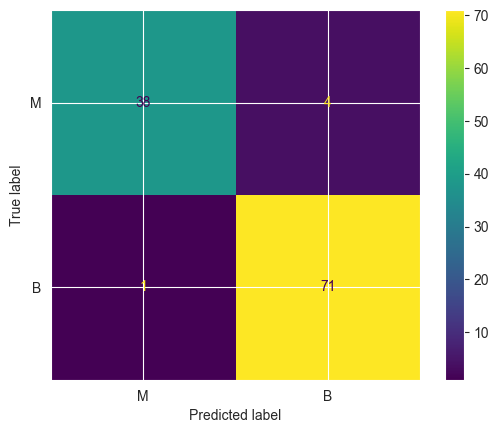

In [14]:
cm = confusion_matrix(y_test, y_pred, labels=['M', 'B'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['M', 'B'])
disp.plot()
# plt.show()
plt.savefig('visuals/confusion_matrix/rf_confusion_matrix.png')

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
# {'C': 10, 'penalty': 'l2'}

lr = LogisticRegression(penalty='l2', C=10)
lr.fit(x_train_scaled, y_train)
y_pred = lr.predict(x_test_scaled)

accuracy = "%.3f" % metrics.accuracy_score(y_test, y_pred)
precision = "%.3f" % metrics.precision_score(y_test, y_pred, pos_label='M')
recall = "%.3f" % metrics.recall_score(y_test, y_pred, pos_label='M')

print(f'Penalty: l2 / C: 10 --- Accuracy: {accuracy} / Precision: {precision} / Recall: {recall}')

Penalty: l2 / C: 10 --- Accuracy: 0.974 / Precision: 1.000 / Recall: 0.929


In [17]:
joblib.dump(lr, 'saved_objects/lr.pkl')

['saved_objects/lr.pkl']

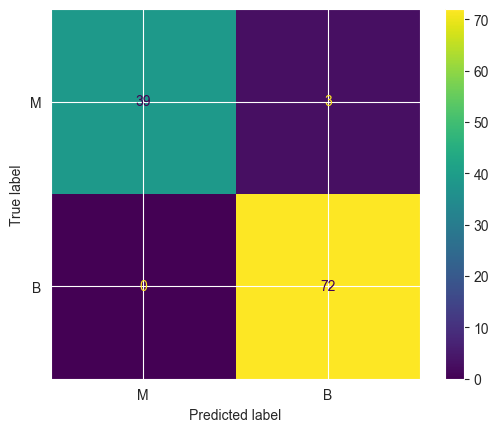

In [18]:
cm = confusion_matrix(y_test, y_pred, labels=['M', 'B'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['M', 'B'])
disp.plot()
# plt.show()
plt.savefig('visuals/confusion_matrix/lr_confusion_matrix.png')

In [19]:
from sklearn.svm import SVC

In [20]:
# {'C': 10, 'degree': 2, 'kernel': 'linear'}

svc = SVC(C=10, kernel='linear')
svc.fit(x_train_scaled, y_train)
y_pred = svc.predict(x_test_scaled)

accuracy = "%.3f" % metrics.accuracy_score(y_test, y_pred)
precision = "%.3f" % metrics.precision_score(y_test, y_pred, pos_label='M')
recall = "%.3f" % metrics.recall_score(y_test, y_pred, pos_label='M')

print(f'C: 10 / Kernel: linear --- Accuracy: {accuracy} / Precision: {precision} / Recall: {recall}')

C: 10 / Kernel: linear --- Accuracy: 0.974 / Precision: 1.000 / Recall: 0.929


In [21]:
joblib.dump(svc, 'saved_objects/svc.pkl')

['saved_objects/svc.pkl']

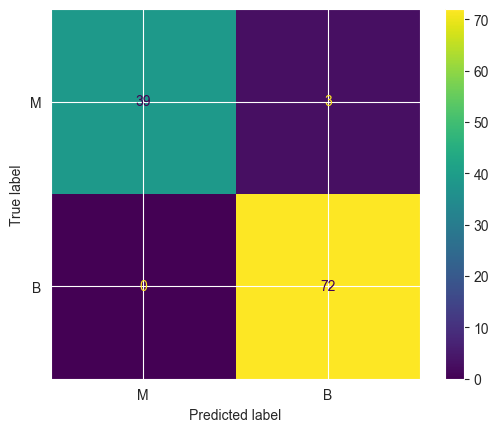

In [22]:
cm = confusion_matrix(y_test, y_pred, labels=['M', 'B'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['M', 'B'])
disp.plot()
# plt.show()
plt.savefig('visuals/confusion_matrix/svm_confusion_matrix.png')

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
# {'n_neighbors': 6, 'weights': 'uniform'}

knn = KNeighborsClassifier(n_neighbors=6, weights='uniform')
knn.fit(x_train_scaled.values, y_train)
y_pred = knn.predict(x_test_scaled.values)

accuracy = "%.3f" % metrics.accuracy_score(y_test, y_pred)
precision = "%.3f" % metrics.precision_score(y_test, y_pred, pos_label='M')
recall = "%.3f" % metrics.recall_score(y_test, y_pred, pos_label='M')

print(f'Neighbors: 6 / Weight: uniform --- Accuracy: {accuracy} / Precision: {precision} / Recall: {recall}')

Neighbors: 6 / Weight: uniform --- Accuracy: 0.947 / Precision: 0.974 / Recall: 0.881


In [25]:
joblib.dump(knn, 'saved_objects/knn.pkl')

['saved_objects/knn.pkl']

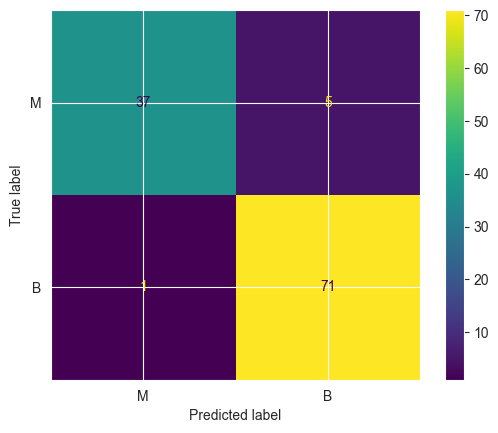

In [26]:
cm = confusion_matrix(y_test, y_pred, labels=['M', 'B'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['M', 'B'])
disp.plot()
# plt.show()
plt.savefig('visuals/confusion_matrix/knn_confusion_matrix.png')

In [27]:
from sklearn.neural_network import MLPClassifier

In [28]:
# {'activation': 'relu', 'hidden_layer_sizes': 100, 'solver': 'lbfgs'}

mlp = MLPClassifier(hidden_layer_sizes=100, activation='relu', solver='lbfgs')
mlp.fit(x_train_scaled, y_train)
y_pred = mlp.predict(x_test_scaled)

accuracy = "%.3f" % metrics.accuracy_score(y_test, y_pred)
precision = "%.3f" % metrics.precision_score(y_test, y_pred, pos_label='M')
recall = "%.3f" % metrics.recall_score(y_test, y_pred, pos_label='M')

print(f'Hidden Layer Size: 100 / Activation: relu / Solver: lbfgs --- Accuracy: {accuracy} / Precision: {precision} / Recall: {recall}')

Hidden Layer Size: 100 / Activation: relu / Solver: lbfgs --- Accuracy: 0.965 / Precision: 0.952 / Recall: 0.952


In [29]:
joblib.dump(mlp, 'saved_objects/mlp.pkl')

['saved_objects/mlp.pkl']

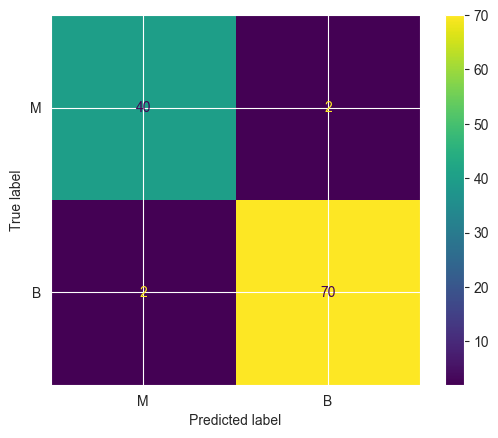

In [30]:
cm = confusion_matrix(y_test, y_pred, labels=['M', 'B'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['M', 'B'])
disp.plot()
# plt.show()
plt.savefig('visuals/confusion_matrix/mlp_confusion_matrix.png')